# Unit 5 - Financial Planning


In [188]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [189]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [257]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [258]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [259]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
#print(json.dumps(data_btc, indent=4))

response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
#print(json.dumps(data_eth, indent=4))

In [260]:
# Fetch current BTC price
btc_price = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_price
#my_btc_value

# Fetch current ETH price
eth_price = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71414.40
The current value of your 5.3 ETH is $9828.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [261]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [262]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [263]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
).df
df_ticker.index = df_ticker.index.date
# Preview DataFrame
df_ticker.head()

AGG                                     SPY                   \
             open    high     low  close   volume    open     high     low   
2021-03-19  113.4  113.54  113.33  113.5  4674852  389.88  391.569  387.15   

                             
            close    volume  
2021-03-19  389.5  93819590

In [264]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [265]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [266]:
# Set monthly household income
monthly_income=12000
crypto = my_btc_value + my_eth_value
total_value_shares = my_spy_value + my_agg_value

# Create savings DataFrame
data = {'amount':[crypto, total_value_shares]} 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# Display savings DataFrame
display(df_savings)

,amount
crypto,81242.773
shares,42175.000


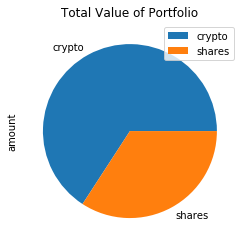

In [267]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Total Value of Portfolio")

In [268]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + total_value_shares 

# Validate saving health
if emergency_fund < total_savings:
        print("You have enough money in your emergency fund. Congrats!")
elif emergency_fund == total_savings:
        print("You have reached this financial goal. Congrats!")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

You have enough money in your emergency fund. Congrats!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [269]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2019-03-19', tz='America/New_York').isoformat()

In [270]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date1,
    end=end_date1,
    limit=1000,
).df
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                           SPY          \
              open      high       low    close   volume    open    high   
2016-03-21  110.06  110.1300  109.9100  109.920  1999255  204.07  204.94   
2016-03-22  110.27  110.2700  109.8300  109.860  1709871  203.76  205.23   
2016-03-23  109.96  110.1400  109.8601  110.100  2750804  204.11  204.33   
2016-03-24  110.29  110.2900  110.0300  110.125  2704598  202.00  203.16   
2016-03-28  110.15  110.2999  110.0800  110.180  2759202  203.61  203.86   

                                       
                low   close    volume  
2016-03-21  203.800  204.68  55119916  
2016-03-22  203.570  204.59  71913432  
2016-03-23  203.010  203.24  67124272  
2016-03-24  201.740  203.14  63975239  
2016-03-28  202.705  203.26  51054477

In [271]:
start_date2 = pd.Timestamp('2019-03-19', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [272]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date2,
    end=end_date2,
    limit=1000,
).df
df_stock_data2.index = df_stock_data2.index.date
# Display sample data
df_stock_data2.head()

AGG                                           SPY            \
                open      high      low    close   volume     open      high   
2019-03-19  107.5651  107.7100  107.565  107.625  1715837  283.485  284.3600   
2019-03-20  107.7100  108.0899  107.670  108.060  3595337  282.160  283.5000   
2019-03-21  108.1300  108.1752  108.050  108.090  3971696  280.640  285.1800   
2019-03-22  108.4600  108.7550  108.370  108.630  2293602  283.220  283.8034   
2019-03-25  108.6300  108.9890  108.600  108.820  2949892  278.870  280.1853   

                                       
               low   close     volume  
2019-03-19  281.41  282.48   65808961  
2019-03-20  280.32  281.53   75155036  
2019-03-21  280.59  284.67   70341224  
2019-03-22  279.18  279.25  109874331  
2019-03-25  277.64  279.03   75858918

In [276]:
# Concat the two data frames to show all data
all_data = pd.concat([df_stock_data, df_stock_data2])
all_data.head().drop_duplicates()

AGG                                           SPY          \
              open      high       low    close   volume    open    high   
2016-03-21  110.06  110.1300  109.9100  109.920  1999255  204.07  204.94   
2016-03-22  110.27  110.2700  109.8300  109.860  1709871  203.76  205.23   
2016-03-23  109.96  110.1400  109.8601  110.100  2750804  204.11  204.33   
2016-03-24  110.29  110.2900  110.0300  110.125  2704598  202.00  203.16   
2016-03-28  110.15  110.2999  110.0800  110.180  2759202  203.61  203.86   

                                       
                low   close    volume  
2016-03-21  203.800  204.68  55119916  
2016-03-22  203.570  204.59  71913432  
2016-03-23  203.010  203.24  67124272  
2016-03-24  201.740  203.14  63975239  
2016-03-28  202.705  203.26  51054477

In [225]:
MC_30_year = MCSimulation(portfolio_data = all_data, 
                          weights = [.40,.60], 
                          num_simulation = 500, 
                          num_trading_days = 252*30)
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008707,1.001672,1.006600,1.008566,1.019946,1.008509,1.002102,0.995875,0.995397,0.992959,...,1.011286,0.999758,1.015600,1.014794,1.000778,0.998224,1.000683,1.013487,1.001009,1.005450
2,1.012767,1.008373,0.998309,1.011246,1.021616,1.009592,0.993001,0.999973,1.000414,0.983868,...,1.016200,0.996672,1.015791,1.014538,1.005368,1.000532,1.013665,1.016756,0.993643,1.012956
3,1.007516,1.010707,0.994977,1.000677,1.028752,1.009094,1.006023,0.996520,1.005264,0.986916,...,1.018737,0.996620,1.007819,1.021793,1.006387,0.997246,1.010644,1.022997,0.991811,1.017582
4,1.007623,1.011790,0.993438,0.993662,1.033479,1.001861,1.017584,0.985961,1.011106,0.991626,...,1.011950,1.001295,1.008634,1.027059,1.002506,0.995618,1.007589,1.027485,0.984272,1.011768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.008514,40.415629,30.479682,8.765749,10.426994,9.888467,19.662752,8.504873,7.257343,9.840589,...,8.315507,12.508093,32.321632,8.995119,28.453859,11.191111,14.884385,4.805439,8.495968,17.292326
7557,8.902370,40.301168,30.819051,8.861132,10.374885,9.847296,19.720892,8.538788,7.204840,9.819739,...,8.316194,12.411082,32.306677,8.961607,28.597014,11.399724,14.892037,4.757355,8.558846,17.260840
7558,9.028711,40.401154,31.089791,8.815229,10.359237,9.853906,19.813322,8.529534,7.222385,9.823944,...,8.268162,12.477716,32.256269,8.990386,28.683714,11.309072,14.720057,4.753732,8.492143,17.415786
7559,8.944678,40.454090,31.260192,8.842130,10.366823,9.914240,19.891659,8.562733,7.282020,9.926063,...,8.182918,12.421105,32.030866,8.999016,28.507300,11.394483,14.562862,4.778694,8.466046,17.492248


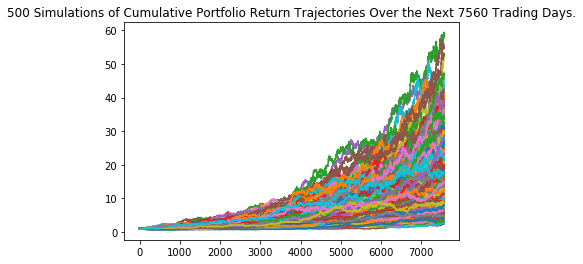

In [227]:
# Printing the simulation input data
line_plot = MC_30_year.plot_simulation()

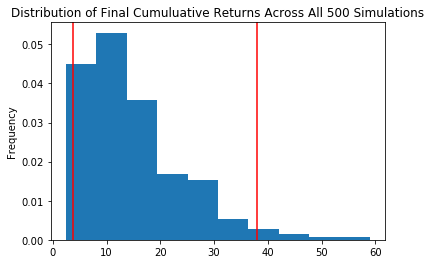

In [228]:
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [229]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.770870
std               9.397086
min               2.410136
25%               8.014231
50%              12.475176
75%              19.083812
max              59.042918
95% CI Lower      3.779628
95% CI Upper     37.916548
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [230]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75592.56 and $758330.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [231]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113388.84 and $1137496.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [245]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(portfolio_data = all_data, 
                                 weights = [.20,.80], 
                                 num_simulation = 500, 
                                 num_trading_days = 252*5)
MC_five_year.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-03-21  110.06  110.1300  109.9100  109.920  1999255.0          NaN   
2016-03-22  110.27  110.2700  109.8300  109.860  1709871.0    -0.000546   
2016-03-23  109.96  110.1400  109.8601  110.100  2750804.0     0.002185   
2016-03-24  110.29  110.2900  110.0300  110.125  2704598.0     0.000227   
2016-03-28  110.15  110.2999  110.0800  110.180  2759202.0     0.000499   

               SPY                                                  
              open    high      low   close    volume daily_return  
2016-03-21  204.07  204.94  203.800  204.68  55119916          NaN  
2016-03-22  203.76  205.23  203.570  204.59  71913432    -0.000440  
2016-03-23  204.11  204.33  203.010  203.24  67124272    -0.006599  
2016-03-24  202.00  203.16  201.740  203.14  63975239    -0.000492  
2016-03-28  203.61  203.86  202.705  203.26  51054477     0.000591

In [246]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989769,0.999991,0.990402,0.992454,0.998353,1.002414,0.988402,0.988001,1.001955,1.014501,...,1.014269,0.970694,1.001411,1.003052,0.996015,0.988352,0.994037,1.007543,0.995320,0.995287
2,0.977056,0.982790,0.994279,0.990321,0.993979,1.001144,0.995833,1.005573,1.020022,1.026248,...,1.022761,0.963627,1.010066,0.990766,0.999748,1.001775,0.982789,1.012414,1.002795,1.005436
3,0.980038,0.988581,1.014523,0.981241,1.003073,1.006428,1.001772,0.993185,1.016806,1.023073,...,1.026723,0.975693,1.029507,0.979182,0.989928,0.992841,0.985698,1.015753,1.007401,1.010663
4,0.973853,0.993178,0.996425,0.990293,1.013936,0.985050,1.009559,0.982430,1.020374,1.018030,...,1.053753,0.973418,1.025087,0.969064,0.990222,0.993860,0.993355,1.001969,1.016535,1.010859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.049198,3.589559,2.214819,2.545366,0.961117,1.362463,1.102746,2.488049,1.928409,1.998785,...,0.948090,1.581208,1.342959,2.653158,2.037721,2.164592,1.305225,1.000376,1.947062,1.043275
1257,2.015212,3.576430,2.178908,2.550046,0.966054,1.380090,1.120813,2.491771,1.955837,1.990542,...,0.923642,1.568128,1.339197,2.655240,2.030356,2.150812,1.309819,0.989107,1.961688,1.042844
1258,2.013199,3.578347,2.188764,2.571646,0.962714,1.383326,1.123720,2.477198,1.940849,2.020701,...,0.917276,1.558810,1.350747,2.656442,2.051905,2.112189,1.303123,0.988492,1.981103,1.055234
1259,2.028788,3.477592,2.181883,2.549643,0.959487,1.379526,1.128209,2.492740,1.961671,2.022126,...,0.920020,1.543117,1.347658,2.670316,2.068940,2.143131,1.297621,0.996409,1.964952,1.045803


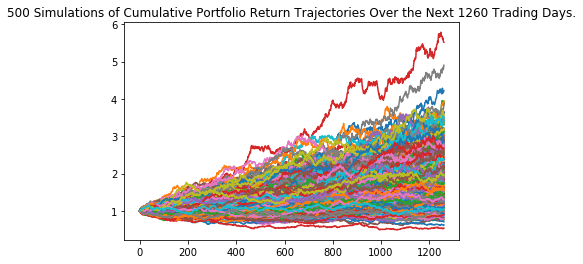

In [247]:
# Plot simulation outcomes
line_plot2 = MC_five_year.plot_simulation()

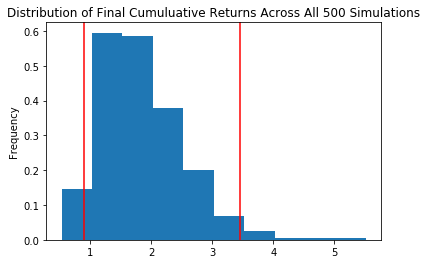

In [248]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_five_year.plot_distribution()

In [249]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              1.847839
std               0.676001
min               0.538128
25%               1.361380
50%               1.733217
75%               2.280962
max               5.514548
95% CI Lower      0.906043
95% CI Upper      3.453788
Name: 1260, dtype: float64


In [250]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl2[8]*initial_investment,2)
ci_upper_five = round(tbl2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54362.59 and $207227.27


### Ten Years Retirement Option

In [251]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(portfolio_data = all_data, 
                                 weights = [.20,.80], 
                                 num_simulation = 500, 
                                 num_trading_days = 252*10)
MC_five_year.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-03-21  110.06  110.1300  109.9100  109.920  1999255.0          NaN   
2016-03-22  110.27  110.2700  109.8300  109.860  1709871.0    -0.000546   
2016-03-23  109.96  110.1400  109.8601  110.100  2750804.0     0.002185   
2016-03-24  110.29  110.2900  110.0300  110.125  2704598.0     0.000227   
2016-03-28  110.15  110.2999  110.0800  110.180  2759202.0     0.000499   

               SPY                                                  
              open    high      low   close    volume daily_return  
2016-03-21  204.07  204.94  203.800  204.68  55119916          NaN  
2016-03-22  203.76  205.23  203.570  204.59  71913432    -0.000440  
2016-03-23  204.11  204.33  203.010  203.24  67124272    -0.006599  
2016-03-24  202.00  203.16  201.740  203.14  63975239    -0.000492  
2016-03-28  203.61  203.86  202.705  203.26  51054477     0.000591

In [252]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991214,1.002293,0.996471,0.985264,0.998631,1.014344,0.990430,1.000216,1.014530,0.991649,...,1.008299,1.002856,1.008766,0.990195,0.988864,0.978076,0.997099,1.004190,0.997714,0.989412
2,1.000675,1.008369,0.989781,0.987899,0.994201,1.004088,1.006771,1.006271,1.016697,0.985928,...,1.004472,0.996390,0.998314,0.976429,0.978892,0.962251,1.010319,1.004177,0.988768,0.992657
3,0.989728,1.005228,0.989936,0.983263,0.985882,1.011196,1.010464,1.017895,1.035003,0.991924,...,1.006229,0.993029,1.001403,0.980183,0.972057,0.953418,1.008823,0.991526,0.987347,0.985067
4,0.991377,1.005693,0.986607,0.968263,0.983883,1.008363,0.992963,1.010630,1.027878,0.997393,...,1.005799,1.005977,1.006043,0.985380,0.975656,0.958293,1.016208,0.996041,0.984295,0.983769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.021190,3.406323,2.706495,2.185026,3.397439,3.391377,4.491310,2.228092,2.851755,7.928819,...,1.704338,3.860588,1.843355,2.791437,2.770850,2.713369,1.366517,1.303161,1.676568,2.296597
2517,2.037301,3.398472,2.705888,2.177481,3.361775,3.432403,4.498049,2.237221,2.856747,7.802208,...,1.691590,3.888168,1.834453,2.825277,2.750315,2.692707,1.373386,1.302040,1.676889,2.284600
2518,2.007808,3.390703,2.716057,2.183678,3.381058,3.454212,4.482706,2.222777,2.830959,7.827722,...,1.723793,3.915808,1.805312,2.798604,2.759727,2.690379,1.380643,1.301286,1.699264,2.278323
2519,2.017708,3.448978,2.737099,2.192535,3.416300,3.397025,4.561941,2.230003,2.837299,7.784461,...,1.700188,3.913702,1.765391,2.787503,2.753678,2.655475,1.400744,1.306377,1.684475,2.252241


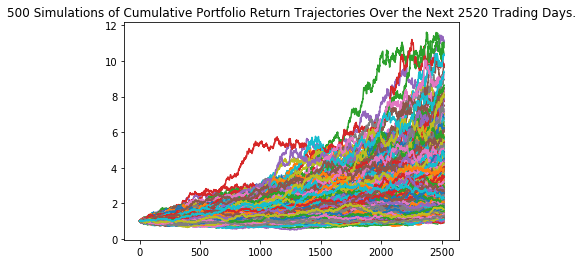

In [253]:
# Plot simulation outcomes
line_plot3 = MC_ten_year.plot_simulation()

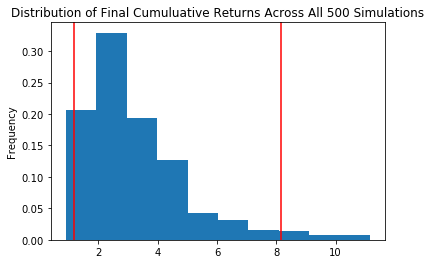

In [254]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_ten_year.plot_distribution()

In [255]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              3.250645
std               1.754660
min               0.901783
25%               2.031861
50%               2.779220
75%               3.990037
max              11.166857
95% CI Lower      1.171377
95% CI Upper      8.148789
Name: 2520, dtype: float64


In [256]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl2[8]*initial_investment,2)
ci_upper_ten = round(tbl2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $45302.16 and $172689.39
